In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [83]:
import DATA_GEN
import EKF
import Testing

In [351]:
# generating data
N = 1000
class_prob = np.array([0.3, 0.7])
alpha = 1.0
mu = np.array([-alpha, alpha])
cov = np.array([[2, 1], [1, 2]])
x, y_class, class0, class1 = DATA_GEN.data_gen(N, class_prob, mu, cov)

In [352]:
# find classification boundary
clf = LinearSVC()
clf.fit(x, y_class)
print("classification boundary =", clf.coef_)
print("classification accuracy =", accuracy_score(y_class, clf.predict(x)))

classification boundary = [[ 0.60580871 -0.58200832]]
classification accuracy = 0.933


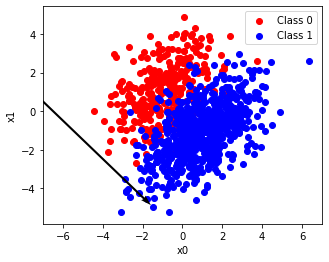

In [353]:
# Plotting data
fig, ax = plt.subplots(figsize=(5,4))
ax.set_xlim(-7.0,7.0)
ax.scatter(class0[:,0], class0[:,1], color='red', label="Class 0")
ax.scatter(class1[:,0], class1[:,1], color='blue', label="Class 1")
quiv = ax.quiver(-7.5, 1.0, clf.coef_[0,0], clf.coef_[0,1], scale=0.37, scale_units='inches')
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.legend()
#plt.savefig('T2.jpg')
plt.show()

In [354]:
# Probability of class0
y_prob = DATA_GEN.prob(x, clf.coef_)

In [355]:
# Task 2- EKF

In [356]:
# model parameters
R = 1.0 # measurement noise
Q = np.asarray([[10, 0.0], [.0, 10.0]]) # process covariance

In [357]:
# estimating theta using EKF
theta_init = np.random.uniform(-1.0, 1.0, 2).reshape(2,1) # un-normalised
cov_init = (10**3)*np.eye(2) # uncertain of initial values

theta_EKF, cov_EKF = EKF.EKF(x, y_prob, R, Q, theta_init, cov_init, N)
n = np.arange(N)

In [358]:
# compute mse between true and estimated boundary
mse_theta = np.zeros((N,2))
for i in range(len(mse_theta)):
    mse_theta[i,0] = mean_squared_error([clf.coef_[0,0]], theta_EKF[i,0])
    mse_theta[i,1] = mean_squared_error([clf.coef_[0,1]], theta_EKF[i,1])

In [359]:
# Classify data and computed prob of class0 using predicted theta
class0_EKF, class1_EKF, y_class_EKF = Testing.pred_class(x, theta_EKF[N-1])

In [360]:
print("classification accuracy =", Testing.class_acc(y_class, y_class_EKF))
print("boundary found =", theta_EKF[N-1])

classification accuracy = 0.927
boundary found = [[ 0.72113039]
 [-0.69279936]]


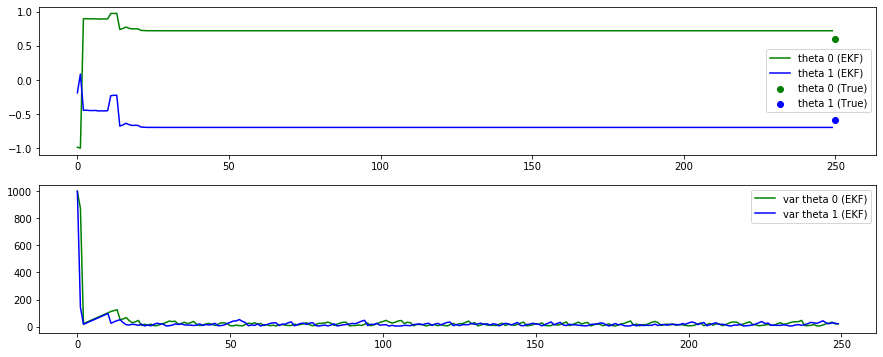

In [361]:
# Plotting estimated state
fig, ax = plt.subplots(figsize=(15,6), nrows=2, ncols=1)
ax[0].plot(n[:250], theta_EKF[:250,0,:], color="g", label="theta 0 (EKF)")
ax[0].plot(n[:250], theta_EKF[:250,1,:], color="b", label="theta 1 (EKF)")
ax[0].scatter(250, clf.coef_[0,0], color='g', label="theta 0 (True)")
ax[0].scatter(250, clf.coef_[0,1], color='b', label="theta 1 (True)")
ax[0].legend()

#ax[1].set_ylim(5,200)
ax[1].plot(n[:250], cov_EKF[:250,0,0], color="g", label="var theta 0 (EKF)")
ax[1].plot(n[:250], cov_EKF[:250,1,1], color="b", label="var theta 1 (EKF)")
ax[1].legend()

#plt.savefig('T2_EKF.jpg')
plt.show()

In [362]:
# mean iterations until convergence
for k in range(len(theta_EKF[:,0,:])):
    if(((theta_EKF[k,0,:] - theta_EKF[250,0,:])**2)**0.5 < 10**-3):
        print(k)
        break
        
for k in range(len(theta_EKF[:,0,:])):
    if(((theta_EKF[k,1,:] - theta_EKF[250,1,:])**2)**0.5 < 10**-3):
        print(k)
        break

23
23


In [363]:
t1 = np.array([9, 6, 8, 17, 4, 15, 6, 7, 21, 23])
print(t1.mean())
print(t1.std())

11.6
6.483826030978931
